In [13]:
from langchain_core.runnables import RunnableConfig, ConfigurableFieldSpec
from typing_extensions import Annotated, TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph


def reducer(a: list, b: int | None) -> list:
    if b is not None:
         return a + [b]
    return a

class State(TypedDict):
     x: Annotated[list, reducer]

class ConfigSchema(TypedDict):
     r: float

graph = StateGraph(State, config_schema=ConfigSchema)

def node(state: State, config: RunnableConfig) -> dict:
    print(f"A-----{state["x"]}")
    r = config["configurable"].get("r", 1.0)
    x = state["x"][-1]
    next_value = x * r * (1 - x)
    return {"x": next_value}


def node_1(state: State, config: RunnableConfig) -> dict:
    print(f"B-----{state["x"]}")
    r = config["configurable"].get("r", 1.0)
    x = state["x"][-1]
    next_value = x * r * (2 - x)
    return {"x": 10+next_value}

def node_2(state: State, config: RunnableConfig) -> dict:
    print(f"C-----{state["x"]}")
    r = config["configurable"].get("r", 1.0)
    x = state["x"][-1]
    next_value = x * r * (3 - x)
    return {"x": 210+next_value}

def node_3(state: State, config: RunnableConfig) -> dict:
    print(f"D-----{state["x"]}")
    r = config["configurable"].get("r", 1.0)
    x = state["x"][-1]
    next_value = x * r * (13 - x)
    return {"x": 310+next_value}

graph.add_node("A", node)
graph.add_node("B", node_1)
graph.add_node("C", node_2)
graph.add_node("D", node_3)
graph.set_entry_point("A")
graph.add_edge("A", "B")
graph.add_edge("A", "C")
graph.add_edge("B", "D")
graph.add_edge("C", "D")
graph.set_finish_point("D")
compiled = graph.compile()

print(compiled.config_specs)
#[ConfigurableFieldSpec(id='r', annotation=<class 'float'>, name=None, description=None, default=None, is_shared=False, dependencies=None)]

step1 = compiled.invoke({"x": 0.5}, {"configurable": {"r": 3.0}})
print(step1)
#{'x': [0.5, 0.75]}

[ConfigurableFieldSpec(id='r', annotation=<class 'float'>, name=None, description=None, default=None, is_shared=False, dependencies=None)]
A-----[0.5]
B-----[0.5, 0.75]
C-----[0.5, 0.75]
D-----[0.5, 0.75, 12.8125, 215.0625]
{'x': [0.5, 0.75, 12.8125, 215.0625, -130058.19921875]}


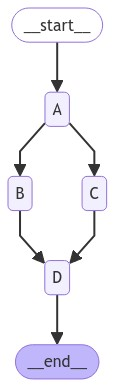

In [12]:
from IPython.display import Image

Image(compiled.get_graph().draw_mermaid_png())